In [1]:
# load package
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator


In [2]:
import csv

In [3]:
lb_adaptive = "../april/lb_7/adaptive.csv"
lb_rand_robin = "../april/lb_7/randArobin.csv"

In [4]:
x = []
adaptive = [] 
with open(lb_adaptive, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            x.append(float(row[row_list[0]]))
            adaptive.append(float(row[row_list[1]]))
        line_count += 1    
        
maxVal = max(adaptive)
#adaptive = [y/maxVal for y in adaptive]    

In [5]:
x = []
adaptiveRaw = [] 
with open(lb_adaptive, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            x.append(float(row[row_list[0]]))
            adaptiveRaw.append(float(row[row_list[1]]))
        line_count += 1    
        

In [6]:
roundRobin = []
randSel = []
with open(lb_rand_robin, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            roundRobin.append(float(row[row_list[2]]))
            randSel.append(float(row[row_list[1]]))
        line_count += 1  
        
#randSel = [y/maxVal for y in randSel] 
#roundRobin = [y/maxVal for y in roundRobin]

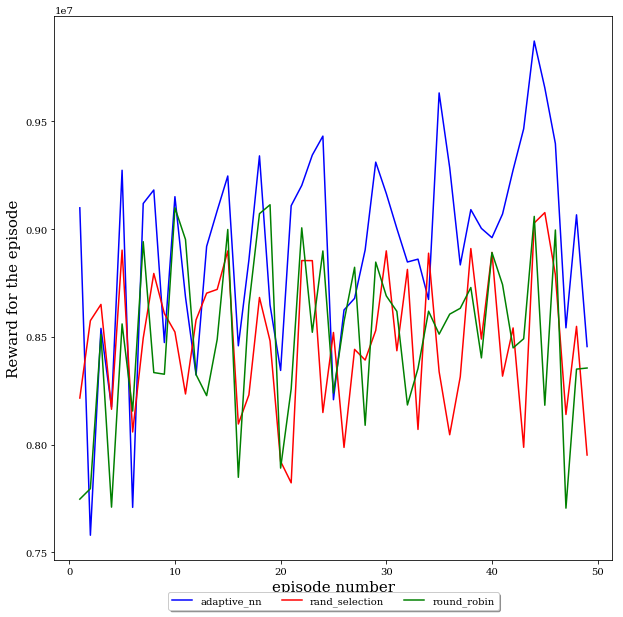

In [7]:
fig = plt.figure(figsize=(10,10))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Reward for the episode', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x, adaptive, color='b', ls='solid', label = "adaptive_nn")
ax.plot(x, randSel, color='r', ls='solid', label = "rand_selection")
ax.plot(x, roundRobin, color='g', ls='solid', label = "round_robin")


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.show()

In [8]:
def moving_avg(x,window_size=1):
    i = 0
    mv_x = []
    while i < len(x)-window_size+1 :
        this_window = x[i:i+window_size]
        window_avg = sum(this_window) / window_size
        mv_x.append(window_avg)
        i += 1
        
    return mv_x

In [9]:
window_size=5
mvavg_adaptive = moving_avg(adaptive,window_size)
mvavg_randSel = moving_avg(randSel,window_size)
mvavg_roundRobin = moving_avg(roundRobin,window_size)
x_mvavg = x[window_size-1:]

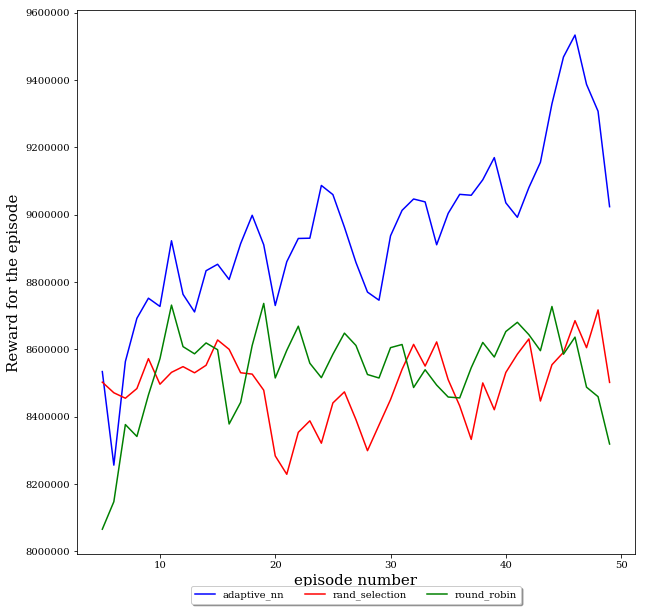

In [10]:
fig = plt.figure(figsize=(10,10))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Reward for the episode', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x_mvavg, mvavg_adaptive, color='b', ls='solid', label = "adaptive_nn")
ax.plot(x_mvavg, mvavg_randSel, color='r', ls='solid', label = "rand_selection")
ax.plot(x_mvavg, mvavg_roundRobin, color='g', ls='solid', label = "round_robin")


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.show()

In [11]:
comp_adaptive = "../may/lb_2b/compute_diff.csv"

In [12]:
x = []
adaptiveComp = [] 
randComp = []
robinComp = []

with open(comp_adaptive, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            x.append(float(row[row_list[0]]))
            #total.append(float(row[row_list[1]]))
            adaptiveComp.append(float(row[row_list[1]]))
            randComp.append(float(row[row_list[2]]))
            robinComp.append(float(row[row_list[3]]))
        line_count += 1  

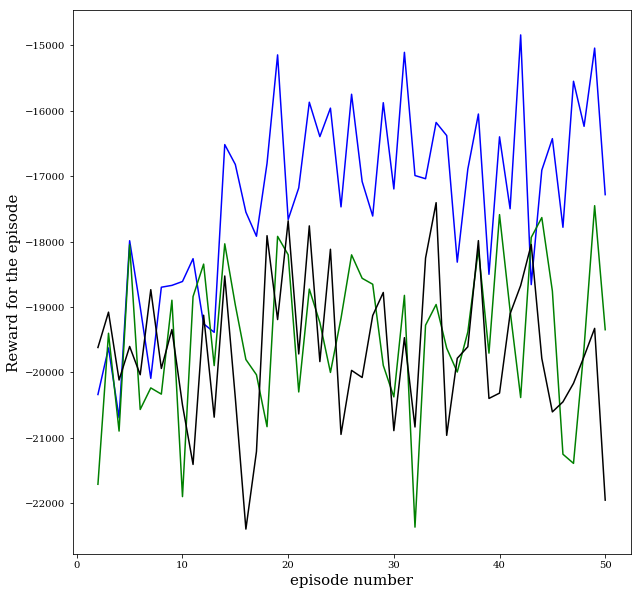

In [13]:
fig = plt.figure(figsize=(10,10))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Reward for the episode', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x, adaptiveComp, color='b', ls='solid', label = "adaptive_nn")

ax.plot(x, randComp, color='g', ls='solid', label = "round_robin")
ax.plot(x, robinComp, color='k', ls='solid', label = "random")

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#          fancybox=True, shadow=True, ncol=5)

plt.show()

In [14]:
window_size=8
mvavg_adaptiveComp = moving_avg(adaptiveComp,window_size)
mvavg_randComp = moving_avg(randComp,window_size)
mvavg_robinComp = moving_avg(robinComp,window_size)
x_mvavg = x[window_size-1:]

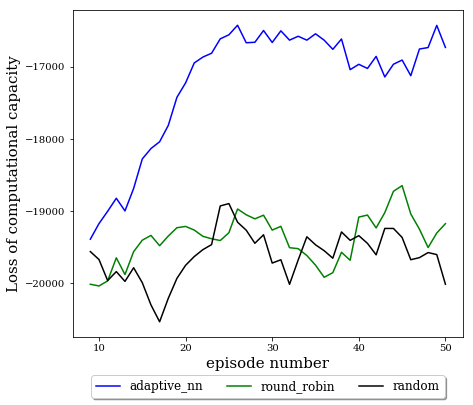

In [15]:
fig = plt.figure(figsize=(7,6))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Loss of computational capacity', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x_mvavg, mvavg_adaptiveComp, color='b', ls='solid', label = "adaptive_nn")

ax.plot(x_mvavg, mvavg_randComp, color='g', ls='solid', label = "round_robin")
ax.plot(x_mvavg, mvavg_robinComp, color='k', ls='solid', label = "random")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5, prop = dict(size=12))

plt.show()

In [16]:
avg_adapt = sum(adaptiveComp[20:]) / len(adaptiveComp[12:])

avg_rand = sum(randComp[20:]) / len(randComp[12:])
avg_robin = sum(robinComp[20:]) / len(robinComp[12:])

print("avg_adapt : ",avg_adapt)

print("avg_robin : ",avg_robin)
print("avg_rand : ",avg_rand)

avg_adapt :  -13060.67259678364
avg_robin :  -15361.69645371363
avg_rand :  -15121.273326795259


In [17]:
robin_better = 100* (avg_adapt-avg_robin) / abs(avg_robin)  
rand_better = 100* (avg_adapt-avg_rand) / abs(avg_rand)

print(" better by than robin: ", robin_better)
print(" better by than retrain: ", rand_better)

 better by than robin:  14.978969698191943
 better by than retrain:  13.627164098410852


In [18]:
#ratio_adaptive = "../may/lb_2b/syncReward_NN_alternator.csv"
ratio_adaptive = "../april/lb_7/syncReward_adaptive.csv"

In [19]:
x = []
adaptiveSyn = [] 
randSyn = []
robinSyn = []

with open(ratio_adaptive, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            x.append(float(row[row_list[0]]))
            #total.append(float(row[row_list[1]]))
            adaptiveSyn.append(float(row[row_list[1]]))
            randSyn.append(float(row[row_list[2]]))
            robinSyn.append(float(row[row_list[3]]))
        line_count += 1  

In [20]:
print(adaptiveSyn)

[8210000.0, 6980000.0, 7640000.0, 7430000.0, 8450000.0, 7070000.0, 8360000.0, 8290000.0, 7700000.0, 8120000.0, 8030000.0, 7520000.0, 8180000.0, 8230000.0, 8440000.0, 7650000.0, 8050000.0, 8420000.0, 7860000.0, 7660000.0, 8310000.0, 8220000.0, 8480000.0, 8400000.0, 7400000.0, 7790000.0, 7860000.0, 8030000.0, 8360000.0, 8230000.0, 8130000.0, 7970000.0, 8040000.0, 7810000.0, 8720000.0, 8370000.0, 7920000.0, 8310000.0, 8240000.0, 8210000.0, 8280000.0, 8330000.0, 8600000.0, 8850000.0, 8840000.0, 8450000.0, 7700000.0, 8030000.0, 7620000.0]


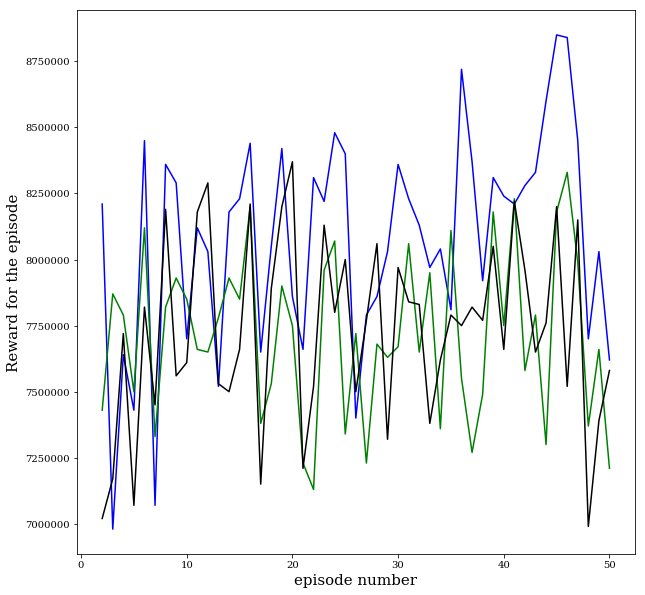

In [21]:
fig = plt.figure(figsize=(10,10))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Reward for the episode', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x, adaptiveSyn, color='b', ls='solid', label = "adaptive_nn")

ax.plot(x, randSyn, color='g', ls='solid', label = "round_robin")
ax.plot(x, robinSyn, color='k', ls='solid', label = "random")

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#          fancybox=True, shadow=True, ncol=5)

plt.show()

In [22]:
window_size=5
mvavg_adaptiveSyn = moving_avg(adaptiveSyn,window_size)
mvavg_randSyn = moving_avg(randSyn,window_size)
mvavg_robinSyn = moving_avg(robinSyn,window_size)
x_mvavg = x[window_size-1:]

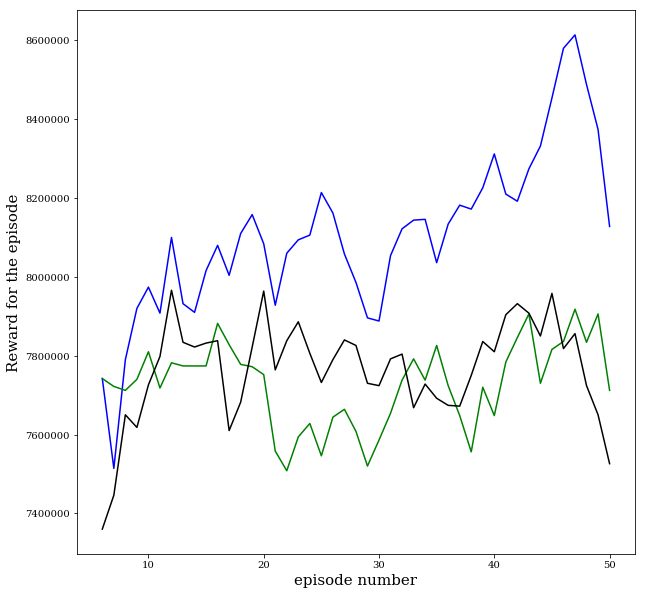

In [23]:
fig = plt.figure(figsize=(10,10))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Reward for the episode', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x_mvavg, mvavg_adaptiveSyn, color='b', ls='solid', label = "adaptive_nn")

ax.plot(x_mvavg, mvavg_randSyn, color='g', ls='solid', label = "round_robin")
ax.plot(x_mvavg, mvavg_robinSyn, color='k', ls='solid', label = "random")

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#          fancybox=True, shadow=True, ncol=5)

plt.show()

In [24]:
#place_adaptive = "../may/lb_2b/placeReward_NN_alternator.csv"
#place_adaptive = "../april/lb_1/placeReward_adaptive.csv"
place_adaptive = "../april/lb_7/placeReward_adaptive.csv"

In [25]:
x = []
adaptiveP = [] 
randP = []
robinP = []


with open(place_adaptive, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            x.append(float(row[row_list[0]]))
            adaptiveP.append(float(row[row_list[1]]))
            randP.append(float(row[row_list[2]]))
            robinP.append(float(row[row_list[3]]))
        line_count += 1  

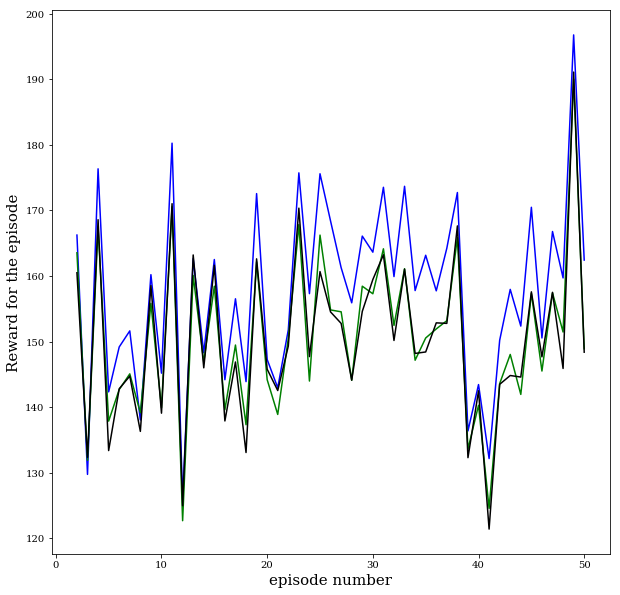

In [26]:
fig = plt.figure(figsize=(10,10))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Reward for the episode', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x, adaptiveP, color='b', ls='solid', label = "adaptive_nn")

ax.plot(x, robinP, color='g', ls='solid', label = "round_robin")
ax.plot(x, randP, color='k', ls='solid', label = "random")

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#          fancybox=True, shadow=True, ncol=5)

plt.show()

In [27]:
window_size=5
mvavg_adaptiveP = moving_avg(adaptiveP,window_size)

mvavg_robinP = moving_avg(robinP,window_size)
mvavg_randP = moving_avg(randP,window_size)
x_mvavg = x[window_size-1:]

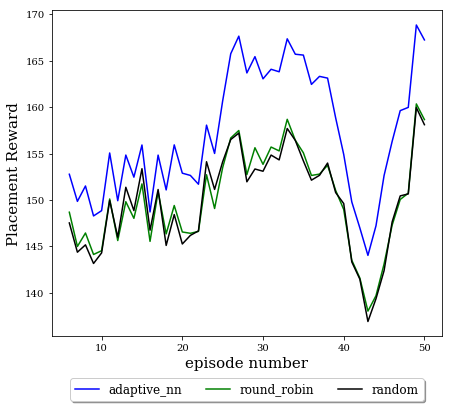

In [28]:
fig = plt.figure(figsize=(7,6))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Placement Reward', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x_mvavg, mvavg_adaptiveP, color='b', ls='solid', label = "adaptive_nn")

ax.plot(x_mvavg, mvavg_robinP, color='g', ls='solid', label = "round_robin")
ax.plot(x_mvavg, mvavg_randP, color='k', ls='solid', label = "random")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11),
          fancybox=True, shadow=True, ncol=5, prop = dict(size=12))
plt.show()

In [29]:
avg_adapt_place = sum(adaptiveP[20:]) / len(adaptiveP[12:])

avg_rand_place = sum(randP[20:]) / len(randP[12:])
avg_robin_place = sum(robinP[20:]) / len(robinP[12:])

print("avg_adapt : ",avg_adapt_place)

print("avg_robin : ",avg_robin_place)
print("avg_rand : ",avg_rand_place)

avg_adapt :  126.42509886015219
avg_robin :  119.64514928166786
avg_rand :  119.32649523149671


In [30]:
robin_better_place = 100* (avg_adapt_place-avg_robin_place) / avg_robin_place  
rand_better_place = 100* (avg_adapt_place-avg_rand_place) / avg_rand_place 

print(" better by than robin: ", robin_better_place)
print(" better by than rand: ", rand_better_place)

 better by than robin:  5.6667149643676895
 better by than rand:  5.9488914133311255
